In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [59]:
def make_single_plot(ax, x, y, y_std, color, marker, ylims, label=None):
    ax.plot(x, y, color=color, marker=marker, markersize=18, label=label)
    ax.fill_between(x, y-y_std, y+y_std, color=color, alpha=0.2)
    ax.set_ylim(ylims[0], ylims[1])
    return ax

In [62]:
# data
bert_layer_l2 = np.array([0.4611, 0.462033, 0.452933, 0.4616, 0.446733, 0.470367])
bert_layer_l2_std = np.array([0.012665, 0.002641, 0.001518, 0.002848, 0.004508, 0.003853])
bert_layer_cos = np.array([0.4034, 0.403367, 0.401867, 0.403833, 0.386767, 0.400267])
bert_layer_cos_std = np.array([0.038897, 0.039625, 0.036024, 0.034475, 0.028414, 0.024402])
bert_layer_normdiff = np.array([0.273267, 0.269633, 0.260933, 0.271267, 0.2585, 0.281967])
bert_layer_normdiff_std = np.array([0.013645, 0.006787, 0.0047, 0.013793, 0.010231, 0.010304])
bert_layer_mf1 = np.array([0.66755, 0.68508, 0.685926, 0.69023, 0.69742, 0.703554])
bert_layer_mf1_std = np.array([0.00117, 0.005592, 0.010413, 0.003851, 0.010947, 0.009547])


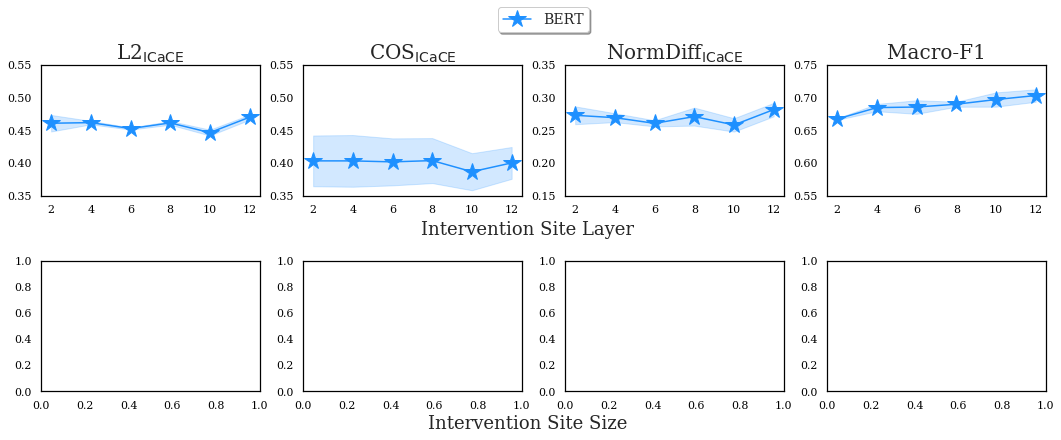

In [61]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 20}
plt.rc('font', **font)

x_layer = [2, 4, 6, 8, 10, 12]
with plt.rc_context({
    'axes.edgecolor':'black', 'xtick.color':'black', 
    'ytick.color':'black', 'axes.facecolor':'white', 
}):
    fig, axs = plt.subplots(2, 4, figsize=(18, 6))
    axs[0,0].set_title(r'L2$_{\rm ICaCE}$', fontsize=20)
    axs[0,1].set_title(r'COS$_{\rm ICaCE}$', fontsize=20)
    axs[0,2].set_title(r'NormDiff$_{\rm ICaCE}$', fontsize=20)
    axs[0,3].set_title(r'Macro-F1', fontsize=20)
    
    # bert layer
    make_single_plot(
        axs[0,0], x_layer, bert_layer_l2, bert_layer_l2_std, 
        color="dodgerblue", marker="*", ylims=[0.35, 0.55], label="BERT"
    )
    make_single_plot(
        axs[0,1], x_layer, bert_layer_cos, bert_layer_cos_std, 
        color="dodgerblue", marker="*", ylims=[0.35, 0.55], label=None
    )
    make_single_plot(
        axs[0,2], x_layer, bert_layer_normdiff, bert_layer_normdiff_std, 
        color="dodgerblue", marker="*", ylims=[0.15, 0.35], label=None
    )
    make_single_plot(
        axs[0,3], x_layer, bert_layer_mf1, bert_layer_mf1_std, 
        color="dodgerblue", marker="*", ylims=[0.55, 0.75], label=None
    )
    
    fig.text(
        0.5, 0.5, 
        'Intervention Site Layer', 
        va='center', ha='center', fontsize=18
    )
    fig.text(
        0.5, 0.05, 
        'Intervention Site Size', 
        va='center', ha='center', fontsize=18
    )
    axs[0,0].legend(loc='upper center', bbox_to_anchor=(2.3, 1.5),
                 ncol=6, fancybox=True, shadow=True, fontsize=14, facecolor="white")
    plt.subplots_adjust(wspace=0.2, 
                        hspace=0.5)